<img src="header_escom26.jpg" alt="header" style="height:200px;">

# Práctica 6:  Programación dinámica: Problema de la mochila entera binaria (0/1 Kapsack problem)
# 2015080672

**Análisis de Algoritmos** </br>
**Profesor: Dr. Flavio Arturo Sánchez Garfias** </br>
**3CM2**

<h1>Problema de la mochila entera</h1>
En algoritmia, el problema de la mochila, comúnmente abreviado por KP (del inglés Knapsack problem) es un problema de optimización combinatoria, es decir, que busca la mejor solución entre un conjunto finito de posibles soluciones a un problema. Modela una situación análoga al llenar una mochila, incapaz de soportar más de un peso determinado, con todo o parte de un conjunto de objetos, cada uno con un peso y valor específicos. Los objetos colocados en la mochila deben maximizar el valor total sin exceder el peso máximo.
<h2>Método de fuerza bruta</h2>
Este método resulta ser bastante inadecuado, pues lo que hace es probar todas las posibles combinaciones de elemento que se pueden llevar, y de entre todas las posibles formas de llevar objetos se toma aquella que tenga el valor máximo.
<center><img src="i1.png"></center></br>
Se tienen que probar todas las combinanciones que se pueden generar al llevar los objetos, considerando que es 1/0, es decir, se lleva o se deja, al finalizar se elige aquella combinación que ofrece más ganancia.
<h2>Método de programación dinámica</h2>
Para poder explicar dicho método considerese la siguiente matriz:
<center><img src="i2.png"></center></br>
Dicha matriz se va llenando de izquierda a derecha, y de arriba hacia abajo, en donde las columnas representan mochilas de diferentes pesos desde 0 hasta el peso de la mochila deseado, y las filas representan cuantos objetos se tienen, así, tanto la primera columna como la primera fila se inician en 0 pues en ninguno de estos casos se obtiene ganancia.</br>
Para llenar las siguientes filas se siguen las siguientes reglas
<ul>
    <li>Si el peso del objeto no se puede ingresar en la mochila porque sobrepasa el peso, se copia la ganancia de la casilla superior</li>
    <li>Si el peso del objeto se puede ingresar a la mochila<ul>
        <li>Se ingresa la ganancia de este objeto más la generada por cualquier otro objeto que quepa. </li>
        <li>Se copia el la ganancia superior si esta es mayor al generado por el objeto que se ingreso más cualquier otro posible objeto que se pueda introducir.</li>
        </ul></li>
</ul>

Import packages <a href="https://numpy.org">Numpy</a> and <a href="https://matplotlib.org">Matplotlib</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

**Definir la función de fuerza bruta**

In [2]:
def kapsack_FB(v,w,wM):
    lista = list(product([0,1], repeat=len(w)))
    combinacionOptima=0
    gananciaOptima=0
    for i in range (len(lista)):
        ganancia=0
        peso=0
        for j in range (len(w)):
            peso=peso+lista[i][j]*w[j]
            ganancia=ganancia+lista[i][j]*v[j]
        if(peso<wM):
            if(ganancia>gananciaOptima):
                gananciaOptima=ganancia
                combinacionOptima=i
    print(lista[combinacionOptima])

**Definir la función de programación dinámica**

In [15]:
def kapsack(v,w,wM):
    n1 = len(w)+1
    n2 = int(wM+1)
    M = np.zeros((n1,n2))
    for i in range (1,n1):
        for j in range (1,n2):
            if (w[i-1]>j):
                M[i,j]=M[i-1,j]
            else:
                if (w[i-1] <= j):
                    aux=M[i-1,j-w[i-1]]+v[i-1]
                    if (aux<M[i-1,j]):
                        M[i,j]=M[i-1,j]
                    else:
                        M[i,j]=aux
    aux=1
    lista = [0]*(len(w))
    while(aux!=0):
        aux=M[i,j]
        if(M[i,j]==M[i,j-1]):
            j=j-1
        else:
            if(M[i,j]==M[i-1,j]):
                i=i-1
            else:
                i=i-1
                j=j-w[i]
                lista[i]=1
    #print(lista)
    return lista

# Pruebas 

A continuación, se crearán arreglos de 10, 100, 1000, 10000, 100000, 1000000 digitos

In [4]:
from time import time
timePD = [0] * (6)
timeDV = [0] * (6)

# Datos de tamaño 10

In [5]:
np.random.seed(101) #THE SEED
tam=10
peso1 = np.random.randint(0,100,tam)
precio1 = np.random.randint(0,100,tam)
print(peso1)
print(precio1)

[95 11 81 70 63 87 75  9 77 40]
[ 4 63 40 60 92 64  5 12 93 40]


**A continuación, ingresa el peso de la mochila**

In [6]:
w1 = 75

**Fuerza bruta**

In [7]:
start_time = time()
kapsack_FB(precio1,peso1,w1)
elapsed_time = time() - start_time
timeDV[0]=elapsed_time

(0, 1, 0, 0, 1, 0, 0, 0, 0, 0)


**Programación dinámica**

In [8]:
start_time = time()
kapsack(precio1,peso1,w1)
elapsed_time = time() - start_time
timePD[0]=elapsed_time

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


# Datos de tamaño 100

In [9]:
np.random.seed(101) #THE SEED
tam=100
peso2 = np.random.randint(0,100,tam)
precio2 = np.random.randint(0,100,tam)
print(peso2)
print(precio2)

[95 11 81 70 63 87 75  9 77 40  4 63 40 60 92 64  5 12 93 40 49 83  8 29
 59 34 44 72 19 10 76 95 87  0 73  8 62 36 83 99 28 63  7 10 52 56 38 73
 52 18 71 15 44  0 12 17 75 79 97 93 24 36 63 19 35 30 10 60 20 27  8 86
 26 87 46 47 54 86  9 45  2 18 58 92 11 10 94 35 28  3 83 84 47 14 69 60
 69 51  6 88]
[71 68 23 35 79 98 67 82 57 77 46  3 46 29 86 21 21 81 23 94 71 20 27 75
  5 49 86 89 63 82 77  3 56 14 49 87 52 13 47 49 24 20 64 52 60 47 29 60
 53 11 40 91 45 97 24 36 38  9 52 67 43  1 79 68 68 61 18 51 14 28 17 87
 46 52 16 70 71 84 10 62 96 57 23 86 85 26 76 66 54 17 65 57 89  2 80 50
 66 88 79 93]


**A continuación, ingresa el peso de la mochila**

In [10]:
w2 = 750

**Fuerza bruta**

In [ ]:
start_time = time()
kapsack_FB(precio2,peso2,w2)
elapsed_time = time() - start_time
timeDV[1]=elapsed_time

**Programación dinámica**

In [11]:
start_time = time()
kapsack(precio2,peso2,w2)
elapsed_time = time() - start_time
timePD[1]=elapsed_time

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]


# Datos de tamaño 1000

In [12]:
np.random.seed(101) #THE SEED
tam=1000
peso3 = np.random.randint(0,100,tam)
precio3 = np.random.randint(0,100,tam)
#print(peso3)
#print(precio3)

**A continuación, ingresa el peso de la mochila**

In [13]:
w3 = 1879

**Fuerza bruta**

In [ ]:
start_time = time()
kapsack_FB(precio3,peso3,w3)
elapsed_time = time() - start_time
timeDV[2]=elapsed_time

**Programación dinámica**

In [14]:
start_time = time()
kapsack(precio3,peso3,w3)
elapsed_time = time() - start_time
timePD[2]=elapsed_time

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

# Datos de tamaño 10000

In [16]:
np.random.seed(101) #THE SEED
tam=10000
peso4 = np.random.randint(0,100,tam)
precio4 = np.random.randint(0,100,tam)
#print(peso4)
#print(precio4)

**A continuación, ingresa el peso de la mochila**

In [17]:
w4 = 6550

**Fuerza bruta**

In [ ]:
start_time = time()
kapsack_FB(precio4,peso4,w4)
elapsed_time = time() - start_time
timeDV[3]=elapsed_time

**Programación dinámica**

In [18]:
start_time = time()
kapsack(precio4,peso4,w4)
elapsed_time = time() - start_time
timePD[3]=elapsed_time

# Datos de tamaño 100000

In [19]:
np.random.seed(101) #THE SEED
tam=100000
peso5 = np.random.randint(0,100,tam)
precio5 = np.random.randint(0,100,tam)
#print(peso5)
#print(precio5)

**A continuación, ingresa el peso de la mochila**

In [20]:
w5 = 24580

**Fuerza bruta**

In [ ]:
start_time = time()
kapsack_FB(precio5,peso5,w5)
elapsed_time = time() - start_time
timeDV[4]=elapsed_time

**Programación dinámica**

In [21]:
start_time = time()
kapsack(precio5,peso5,w5)
elapsed_time = time() - start_time
timePD[4]=elapsed_time

# Datos de tamaño 1000000

In [22]:
np.random.seed(101) #THE SEED
tam=1000000
peso6 = np.random.randint(0,100,tam)
precio6 = np.random.randint(0,100,tam)
#print(peso6)
#print(precio6)

**A continuación, ingresa el peso de la mochila**

In [23]:
w6 = 189654

**Fuerza bruta**

In [ ]:
start_time = time()
kapsack_FB(precio6,peso6,w6)
elapsed_time = time() - start_time
timeDV[5]=elapsed_time

**Programación dinámica**

In [ ]:
start_time = time()
kapsack(precio6,peso6,w6)
elapsed_time = time() - start_time
timePD[5]=elapsed_time

# Gráficas
**La gráfica con los diferentes tiempos se encuentra a continuación**

**NOTA: La implementación por divide y vencerás para arreglos de tamaño 100 no terminaba pasadas más de 3 horas, es por ello que se detuvo**</br></br>
**Si se desea obtener los tiempos reales eliminar la siguiente celda y correr las celdas que tienen la ejecución del DV para 100 datos**

In [36]:
timeDV[1]=10800

In [37]:
print("Método:\t\t10 datos\t100 datos\t1000 datos\t10000 datos\t\t100000 datos\t\t1000000 datos\nPD\t\t%.10f"%timePD[0],"\t%.10f" %timePD[1], "\t%.10f" %timePD[2], "\t%.10f" %timePD[3], "\t\t%.10f" %timePD[4], "\t%.10f" %timePD[5], "\nDV\t\t%.10f"%timeDV[0],"\t%.5f"%timeDV[1], "\t%.10f" %timeDV[2], "\t%.10f" %timeDV[3], "\t\t%.10f" %timeDV[4], "\t\t%.10f" %timeDV[5])

Método:		10 datos	100 datos	1000 datos	10000 datos		100000 datos		1000000 datos
PD		0.0009601116 	0.0905044079 	2.6301391125 	94.8526356220 		3564.3826541901 	0.0000000000 
DV		0.0069792271 	10800.00000 	0.0000000000 	0.0000000000 		0.0000000000 		0.0000000000


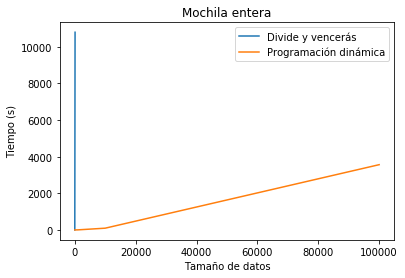

In [38]:
n=[10,100,1000,10000,100000,1000000]
plt.plot(n[:2],timeDV[:2],label="Divide y vencerás")
plt.plot(n[:5],timePD[:5],label="Programación dinámica")

plt.xlabel('Tamaño de datos')
plt.ylabel('Tiempo (s)')

plt.title("Mochila entera")

plt.legend()

plt.show()

# Conclusiones

Gracias al desarrollo de esta práctica se logró realizar otra implementación de la técnica de programación dinámica en donde se permitio resolver el problema de la Mochila entera, el cual consiste en tener una cierta cantidad de objetos cada uno con un respectivo valor, así como una mochila a la que unicamente le cabe cierto peso, y el problema busca llevar los objetos de forma que se aproveche en su máximo la capacidad de la mochila y también se pueda obtener la mayor ganancia, esto se logró realizar por dos técnicas, la primera de ellas que resulto ser bastante ineficiente es obtener todas las combinaciones que se pueden para llevar los objetos, y una vez calculada la ganancia para todas estas, elegir aquella que sea mayor, esto tiene una complejidad de 2 a la n, pues se tienen que generar las combinaciones binarias y probarlas.
Por el otro lado se realizó mediante la programación dinámica, en la que se contaba con una matriz cuyo llenado tenía ciertas reglas a través de las cuales se lograba determinar en la casilla inferior derecha cual era la mayor ganancia que se podía obtener, y empleando las mismas reglas se puede hacer el recorrido inverso para determinar que objetos se pueden llevar, de la misma forma que los problemas anteriores se logró visualizar que esta técnica resultó ser más eficiente que aquella obtenida por fuerza bruta, pues los tiempos generados para esta son mucho menores a los de fuerza bruta, sin embargo, no logró terminar todos los datos pues requiere una gran cantidad de memoria para tener la matriz requerida y de golpe, es por ello, que esta técnica se encuentra muy limitada, pues aunque logre optimizar los tiempos de ejecución, se encuentra limitada por los recursos de la memoria del computador.